In [163]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


In [164]:
netflix_data = pd.read_csv('netfix_cleaned.csv')

In [165]:
netflix_data.head()

,names,release_year,maturity_rating,duration,description,genre,mood,cast,subtitles,audio
0,Mission Majnu,2023,U/A 16+,2h 9m,"In the 1970s, an undercover Indian spy takes o...","['Spy Movies', 'Hindi-Language Movies', 'Bolly...",Suspenseful,"['Sidharth Malhotra', 'Rashmika Mandanna', 'Pa...","['English,', 'English,', 'Hindi']","['English,', 'Hindi - Audio Description,', 'Hi..."
1,Cirkus,2022,U/A 7+,2h 14m,Chaos and comedy take the spotlight when a rin...,"['Hindi-Language Movies', 'Bollywood Movies', ...",Goofy,"['Ranveer Singh', 'Varun Sharma', 'Pooja Hegde...","['English,', 'Hindi']",['Hindi [Original]']
2,Gangubai Kathiawadi,2022,U/A 16+,2h 33m,"Duped and sold to a brothel, a young woman fea...","['Hindi-Language Movies', 'Movies Based on Boo...",Provocative,"['Alia Bhatt', 'Vijay Raaz', 'Seema Pahwa', 'A...","['English,', 'Hindi']","['Hindi [Original],', 'Telugu']"
3,Thunivu,2023,U/A 16+,2h 22m,A major bank heist takes an unnerving turn whe...,"['Crime Movies', 'Action & Adventure']",Exciting,"['Ajith Kumar', 'Manju Warrier', 'Samuthirakan...","['English,', 'Hindi']",['Tamil [Original]']
4,Bhool Bhulaiyaa 2,2022,U/A 13+,2h 21m,"When strangers Reet and Ruhan cross paths, the...","['Hindi-Language Movies', 'Bollywood Movies', ...",Offbeat,"['Tabu', 'Kartik Aaryan', 'Kiara Advani', 'Raj...","['English,', 'Hindi']",['Hindi [Original]']


In [166]:
netflix_data.describe()

,release_year
count,560.000000
mean,2016.521429
std,6.282517
min,1993.000000
25%,2012.000000
50%,2019.000000
75%,2022.000000
max,2023.000000


In [167]:
#finding if there is any nan column
nans_indices = netflix_data.columns[netflix_data.isna().any()].tolist()
print(nans_indices)

['mood']


In [168]:
#drop duplicate entry
netflix_data.drop_duplicates(subset="names", inplace=True)

In [169]:
# to check if there is duplicate entry
netflix_data.shape

(245, 10)

In [170]:
netflix_data.dropna(inplace=True)

In [171]:
# netflix_data['mood'].values
netflix_data['mood'].unique()

array(['Suspenseful', 'Goofy', 'Provocative', 'Exciting', 'Offbeat',
       'Quirky', 'Feel-Good', 'Emotional', 'Heartfelt', 'Ominous',
       'Sentimental', 'Adrenaline Rush', 'Dark', 'Intimate', 'Charming',
       'Violent', 'Gritty', 'Romantic', 'Scary', 'Witty', 'Mind-Bending',
       'Steamy', 'Understated', 'Swoonworthy', 'Bittersweet', 'Inspiring',
       'Raunchy', 'Chilling'], dtype=object)

In [172]:
netflix_data.isnull().sum()

names              0
release_year       0
maturity_rating    0
duration           0
description        0
genre              0
mood               0
cast               0
subtitles          0
audio              0
dtype: int64

<h1>Grouping Movies based on Mood</h1>

[40 18 17 17 16 13 12 11 10  8  7  6  6  5  5  5  5  5  3  3  3  2  2  2
  1  1  1  1]


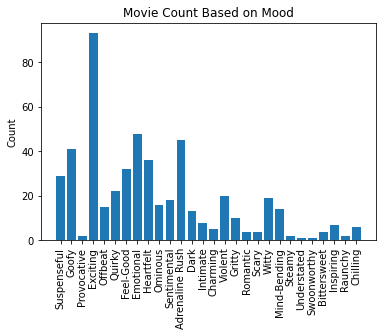

In [173]:
mood = ['Suspenseful', 'Goofy', 'Provocative', 'Exciting', 'Offbeat',
       'Quirky', 'Feel-Good', 'Emotional', 'Heartfelt', 'Ominous',
       'Sentimental', 'Adrenaline Rush', 'Dark', 'Intimate', 'Charming',
       'Violent', 'Gritty', 'Romantic', 'Scary', 'Witty', 'Mind-Bending',
       'Steamy', 'Understated', 'Swoonworthy', 'Bittersweet', 'Inspiring',
       'Raunchy', 'Chilling']

counts = [29, 41, 2, 93, 15, 22,  32, 48, 36, 16,  18, 45, 13, 8, 5, 20, 10, 4, 4, 19, 14, 2, 1, 1, 4, 7,  2, 6]

y = np.array(netflix_data['mood'].value_counts())
print(y)

fig, ax = plt.subplots()
ax.bar(mood,counts)

ax.set_ylabel('Count')
ax.set_title('Movie Count Based on Mood')
plt.xticks(rotation=90)
plt.show()

<h1>Finding Movies Released in 2023</h1>

In [174]:
movies_2023 = netflix_data[netflix_data['release_year'] == 2023]
movies_2023

,names,release_year,maturity_rating,duration,description,genre,mood,cast,subtitles,audio
0,Mission Majnu,2023,U/A 16+,2h 9m,"In the 1970s, an undercover Indian spy takes o...","['Spy Movies', 'Hindi-Language Movies', 'Bolly...",Suspenseful,"['Sidharth Malhotra', 'Rashmika Mandanna', 'Pa...","['English,', 'English,', 'Hindi']","['English,', 'Hindi - Audio Description,', 'Hi..."
3,Thunivu,2023,U/A 16+,2h 22m,A major bank heist takes an unnerving turn whe...,"['Crime Movies', 'Action & Adventure']",Exciting,"['Ajith Kumar', 'Manju Warrier', 'Samuthirakan...","['English,', 'Hindi']",['Tamil [Original]']
36,Nanpakal Nerathu Mayakkam,2023,U/A 13+,1h 47m,"In this Malayalam-Tamil drama, an irritable Ja...",['Dramas'],Intimate,"['Mammootty', 'Ramya Suvi', 'Ramya Pandian', '...",['English'],"['Hindi,', 'Malayalam [Original],', 'Telugu']"
175,Call Me Chihiro,2023,U/A 16+,2h 11m,An unapologetic former sex worker starts worki...,['Dramas'],Understated,"['Kasumi Arimura', 'Hana Toyoshima', 'Tetta Sh...","['English,', 'English,', 'French,', 'Japanese']","['English,', 'Japanese - Audio Description,', ..."
179,The Strays,2023,U/A 16+,1h 37m,A woman's meticulously crafted life of privile...,"['Dramas', 'Thriller Movies']",Ominous,"['Ashley Madekwe', 'Jorden Myrie', 'Bukky Bakr...",['English'],"['English - Audio Description,', 'English [Ori..."
181,We Have a Ghost,2023,U/A 13+,2h 7m,After finding a ghost with a murky past haunti...,"['Family Features', 'US Movies', 'Teen Movies'...",Heartfelt,"['David Harbour', 'Anthony Mackie', ""Jahi Di'A...",['English'],"['English - Audio Description,', 'English [Ori..."
193,Dog Gone,2023,U/A 7+,1h 35m,"When his beloved dog goes missing, a young man...","['Family Features', 'Movies Based on Real Life...",Inspiring,"['Rob Lowe', 'Johnny Berchtold', 'Kimberly Wil...",['English'],"['English - Audio Description,', 'English [Ori..."


<h1>Grouping Shows Based on Maturity Rating</h1>

[4 2 1]


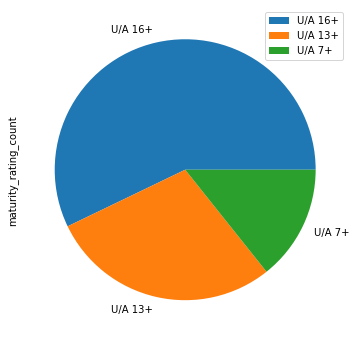

In [175]:
#group the movies based on maturity rating
maturity_cat = ['U/A 16+', 'U/A 13+', 'U/A 7+']
maturity_rating_count = np.array(movies_2023['maturity_rating'].value_counts())
print(maturity_rating_count)

# movies_2023.plot.pie(y=maturity_rating_count,figsize=(5, 5))


df = pd.DataFrame({'maturity_rating_count' : np.array(movies_2023['maturity_rating'].value_counts())},
                   index=['U/A 16+', 'U/A 13+', 'U/A 7+'])

plot = df.plot.pie(y='maturity_rating_count', figsize=(6, 6))

In [176]:
#to get the movie, with its year released and also the casts

netflix_data.iloc[:, [0,1,6]]

,names,release_year,mood
0,Mission Majnu,2023,Suspenseful
1,Cirkus,2022,Goofy
2,Gangubai Kathiawadi,2022,Provocative
3,Thunivu,2023,Exciting
4,Bhool Bhulaiyaa 2,2022,Offbeat
...,...,...,...
538,Taare Zameen Par,2007,Inspiring
539,18 Pages,2022,Emotional
550,Kung-Fu Kings 4: The Challenge of Kung Fu Brot...,2018,Goofy
553,Haseen Dillruba,2021,Offbeat


In [177]:
netflix_data.tail(5)

,names,release_year,maturity_rating,duration,description,genre,mood,cast,subtitles,audio
538,Taare Zameen Par,2007,U/A 13+,2h 42m,When daydreamer Ishaan is sent to boarding sch...,"['Hindi-Language Movies', 'Bollywood Movies', ...",Inspiring,"['Aamir Khan', 'Darsheel Safary', 'Tanay Chhed...",['English'],['Hindi [Original]']
539,18 Pages,2022,U/A 13+,2h 17m,When a heartbroken Siddhu stumbles upon a two-...,"['Dramas', 'Romantic Movies']",Emotional,"['Nikhil Siddharth', 'Anupama Parameswaran', '...",['English'],['Telugu [Original]']
550,Kung-Fu Kings 4: The Challenge of Kung Fu Brot...,2018,U/A 7+,1h 26m,"While in Japan, best friends Motu and Patlu ha...","['Hindi-Language Movies', 'Children & Family M...",Goofy,"['Saurav Chakraborty', 'Sanket Mhatre', 'Kamal...",['English'],"['Bangla,', 'Gujarati,', 'Hindi [Original],', ..."
553,Haseen Dillruba,2021,U/A 16+,2h 16m,Under investigation as a suspect in her husban...,"['Hindi-Language Movies', 'Bollywood Movies', ...",Offbeat,"['Taapsee Pannu', 'Vikrant Massey', 'Harshvard...","['English,', 'Hindi']","['English,', 'Hindi - Audio Description,', 'Hi..."
559,Kabhi Khushi Kabhie Gham,2001,U/A 13+,3h 29m,Years after his father disowns his adopted bro...,"['Hindi-Language Movies', 'Bollywood Movies', ...",Sentimental,"['Amitabh Bachchan', 'Jaya Bhaduri', 'Shah Ruk...",['English'],['Hindi [Original]']


<h1>Finding Shows casted by Kiara Advani :) </h1>

In [178]:
# Kiara Advani is my fav actress <333 , so i am gg to find which show she casts in

casts = netflix_data['cast']
cast_nparr = np.array(casts)
movie_nparr = np.array(netflix_data['names'])
# cast_nparr
# movie_nparr

new_arr = [movie_nparr,cast_nparr]
movie_list = []
for i in range(len(movie_nparr)):
    if 'Kiara Advani' in new_arr[1][i]:
        movie_list.append(new_arr[0][i])
print(movie_list)


['Bhool Bhulaiyaa 2', 'Kabir Singh', 'Lust Stories', 'Indoo Ki Jawani']


In [179]:
netflix_data_sorted_years = netflix_data.sort_values(by = 'release_year', axis=0, ascending=False)
netflix_data_sorted_years

,names,release_year,maturity_rating,duration,description,genre,mood,cast,subtitles,audio
0,Mission Majnu,2023,U/A 16+,2h 9m,"In the 1970s, an undercover Indian spy takes o...","['Spy Movies', 'Hindi-Language Movies', 'Bolly...",Suspenseful,"['Sidharth Malhotra', 'Rashmika Mandanna', 'Pa...","['English,', 'English,', 'Hindi']","['English,', 'Hindi - Audio Description,', 'Hi..."
36,Nanpakal Nerathu Mayakkam,2023,U/A 13+,1h 47m,"In this Malayalam-Tamil drama, an irritable Ja...",['Dramas'],Intimate,"['Mammootty', 'Ramya Suvi', 'Ramya Pandian', '...",['English'],"['Hindi,', 'Malayalam [Original],', 'Telugu']"
179,The Strays,2023,U/A 16+,1h 37m,A woman's meticulously crafted life of privile...,"['Dramas', 'Thriller Movies']",Ominous,"['Ashley Madekwe', 'Jorden Myrie', 'Bukky Bakr...",['English'],"['English - Audio Description,', 'English [Ori..."
193,Dog Gone,2023,U/A 7+,1h 35m,"When his beloved dog goes missing, a young man...","['Family Features', 'Movies Based on Real Life...",Inspiring,"['Rob Lowe', 'Johnny Berchtold', 'Kimberly Wil...",['English'],"['English - Audio Description,', 'English [Ori..."
175,Call Me Chihiro,2023,U/A 16+,2h 11m,An unapologetic former sex worker starts worki...,['Dramas'],Understated,"['Kasumi Arimura', 'Hana Toyoshima', 'Tetta Sh...","['English,', 'English,', 'French,', 'Japanese']","['English,', 'Japanese - Audio Description,', ..."
...,...,...,...,...,...,...,...,...,...,...
75,Jurassic Park III,2001,U/A 16+,1h 32m,An aerial tour of an infamous dinosaur island ...,"['Sci-Fi Movies', 'US Movies', 'Movies Based o...",Exciting,"['Sam Neill', 'Téa Leoni', 'William H. Macy', ...","['English,', 'Hindi']","['English - Audio Description,', 'English [Ori..."
104,Shrek,2001,U/A 7+,1h 30m,On a mission to retrieve a princess from a fir...,"['Family Features', 'US Movies', 'Movies Based...",Witty,"['Mike Myers', 'Eddie Murphy', 'Cameron Diaz',...","['English,', 'Hindi']","['English - Audio Description,', 'English [Ori..."
559,Kabhi Khushi Kabhie Gham,2001,U/A 13+,3h 29m,Years after his father disowns his adopted bro...,"['Hindi-Language Movies', 'Bollywood Movies', ...",Sentimental,"['Amitabh Bachchan', 'Jaya Bhaduri', 'Shah Ruk...",['English'],['Hindi [Original]']
291,Final Destination,2000,A,1h 37m,After narrowly avoiding a fatal plane explosio...,"['US Movies', 'Horror Movies']",Scary,"['Devon Sawa', 'Ali Larter', 'Seann William Sc...",['English'],"['English [Original],', 'Hindi']"


In [180]:
year = netflix_data['release_year'].unique()
# print(year)
count_per_year = netflix_data['release_year'].value_counts()
# print(count_per_year)

fig = px.bar(netflix_data, y =count_per_year, x=year, 
             orientation='v', color=year, 
             title='Number of Netflix Shows Released Per Year',
             labels={'x': 'Year', 'y': 'Count per Year'}
            )
fig.show()


<h1>Recommend Shows based on Genre</h1>

In [181]:
#Decide which features to use to do recommendation

reco_df= netflix_data[['names', 'cast', 'genre']]
reco_df.head()

,names,cast,genre
0,Mission Majnu,"['Sidharth Malhotra', 'Rashmika Mandanna', 'Pa...","['Spy Movies', 'Hindi-Language Movies', 'Bolly..."
1,Cirkus,"['Ranveer Singh', 'Varun Sharma', 'Pooja Hegde...","['Hindi-Language Movies', 'Bollywood Movies', ..."
2,Gangubai Kathiawadi,"['Alia Bhatt', 'Vijay Raaz', 'Seema Pahwa', 'A...","['Hindi-Language Movies', 'Movies Based on Boo..."
3,Thunivu,"['Ajith Kumar', 'Manju Warrier', 'Samuthirakan...","['Crime Movies', 'Action & Adventure']"
4,Bhool Bhulaiyaa 2,"['Tabu', 'Kartik Aaryan', 'Kiara Advani', 'Raj...","['Hindi-Language Movies', 'Bollywood Movies', ..."


In [182]:
# reco_df.iloc[0]['genre']
reco_df[['names']]

,names
0,Mission Majnu
1,Cirkus
2,Gangubai Kathiawadi
3,Thunivu
4,Bhool Bhulaiyaa 2
...,...
538,Taare Zameen Par
539,18 Pages
550,Kung-Fu Kings 4: The Challenge of Kung Fu Brot...
553,Haseen Dillruba


In [183]:
#Suggest a Similar Content based on certain actress
reco_df['cast'].head()


0    ['Sidharth Malhotra', 'Rashmika Mandanna', 'Pa...
1    ['Ranveer Singh', 'Varun Sharma', 'Pooja Hegde...
2    ['Alia Bhatt', 'Vijay Raaz', 'Seema Pahwa', 'A...
3    ['Ajith Kumar', 'Manju Warrier', 'Samuthirakan...
4    ['Tabu', 'Kartik Aaryan', 'Kiara Advani', 'Raj...
Name: cast, dtype: object

In [184]:
for i in range(len(reco_df)):
    # extract cast names and clean up formatting
    names = reco_df['cast'].iloc[i].lower().lstrip("[").strip(" ").replace("'","").replace(' ','').rstrip("]").split(",")
    formatted_names = [name.strip().replace("'","").replace(' ','') for name in names]
    
    # update cast column for current row
    reco_df.at[i, 'cast'] = formatted_names
    
    # print current row to verify update
    print(reco_df.iloc[i])


names                                        Mission Majnu
cast     [sidharthmalhotra, rashmikamandanna, parmeetse...
genre    ['Spy Movies', 'Hindi-Language Movies', 'Bolly...
Name: 0, dtype: object
names                                               Cirkus
cast     [ranveersingh, varunsharma, poojahegde, jacque...
genre    ['Hindi-Language Movies', 'Bollywood Movies', ...
Name: 1, dtype: object
names                                  Gangubai Kathiawadi
cast     [aliabhatt, vijayraaz, seemapahwa, ajaydevgn, ...
genre    ['Hindi-Language Movies', 'Movies Based on Boo...
Name: 2, dtype: object
names                                              Thunivu
cast     [ajithkumar, manjuwarrier, samuthirakani, john...
genre               ['Crime Movies', 'Action & Adventure']
Name: 3, dtype: object
names                                    Bhool Bhulaiyaa 2
cast     [tabu, kartikaaryan, kiaraadvani, rajpalyadav,...
genre    ['Hindi-Language Movies', 'Bollywood Movies', ...
Name: 4, dtype: object


/Users/ahminhui/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3281: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [185]:
reco_df['cast'].head()

0    [sidharthmalhotra, rashmikamandanna, parmeetse...
1    [ranveersingh, varunsharma, poojahegde, jacque...
2    [aliabhatt, vijayraaz, seemapahwa, ajaydevgn, ...
3    [ajithkumar, manjuwarrier, samuthirakani, john...
4    [tabu, kartikaaryan, kiaraadvani, rajpalyadav,...
Name: cast, dtype: object

In [186]:
# creating and initializing the new column to empty string for all rows
reco_df['keywords'] = ""

for index, row in reco_df.iterrows():
    genre = row['genre']

    # instantiating a Rake object
    # by default it uses english stopwords from NLTK (natural language tool kit)
    # and discards all puntuation characters
    r = Rake()

    # extracting the keywords from the text by passing movie names 
    r.extract_keywords_from_text(genre)

    # getting the dictionary whith key words and their scores
    key_words_dict_scores = r.get_word_degrees()

    # assigning the key words to the new column
    row['keywords'] = list(key_words_dict_scores.keys())



TypeError: expected string or bytes-like object

In [187]:
reco_df['keywords'].head()
# print(type(reco_df['keywords'].iloc[0]))

0    [[', spy, movies, ',, hindi, language, bollywo...
1    [[', hindi, language, movies, ',, bollywood, c...
2    [[', hindi, language, movies, ',, based, books...
3       [[', crime, movies, ',, action, adventure, ']]
4    [[', hindi, language, movies, ',, bollywood, c...
Name: keywords, dtype: object

In [188]:
# dropping the movie names column
# df.drop(columns = ['Plot'], inplace = True)
reco_df.drop('genre', axis=1, inplace=True)

In [189]:
reco_df.head()

,names,cast,keywords
0,Mission Majnu,"[sidharthmalhotra, rashmikamandanna, parmeetse...","[[', spy, movies, ',, hindi, language, bollywo..."
1,Cirkus,"[ranveersingh, varunsharma, poojahegde, jacque...","[[', hindi, language, movies, ',, bollywood, c..."
2,Gangubai Kathiawadi,"[aliabhatt, vijayraaz, seemapahwa, ajaydevgn, ...","[[', hindi, language, movies, ',, based, books..."
3,Thunivu,"[ajithkumar, manjuwarrier, samuthirakani, john...","[[', crime, movies, ',, action, adventure, ']]"
4,Bhool Bhulaiyaa 2,"[tabu, kartikaaryan, kiaraadvani, rajpalyadav,...","[[', hindi, language, movies, ',, bollywood, c..."


In [190]:
reco_df['keywords'] = reco_df['keywords'].apply(lambda x: ' '.join(map(str, x)))

In [ ]:
# converting the list to str to do data processing, to remove "[" , "]" and ","
type(reco_df['keywords'].iloc[0])

str

In [191]:
reco_df['keywords'] = reco_df['keywords'].str.replace("[","").str.replace(",","").str.replace("]","").str.replace("'","")

<ipython-input-191-62e5de7c0550>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [192]:
reco_df['keywords'].iloc[0]
                         

' spy movies  hindi language bollywood action adventure '

In [193]:
reco_df['keywords'] = reco_df['keywords'].str.split()


In [194]:
reco_df['keywords']

0      [spy, movies, hindi, language, bollywood, acti...
1         [hindi, language, movies, bollywood, comedies]
2        [hindi, language, movies, based, books, dramas]
3                     [crime, movies, action, adventure]
4      [hindi, language, movies, bollywood, comedies,...
                             ...                        
219                                                   []
220                                                   []
221                                                   []
222                                                   []
223                                                   []
Name: keywords, Length: 290, dtype: object

In [195]:
reco_df

,names,cast,keywords
0,Mission Majnu,"[sidharthmalhotra, rashmikamandanna, parmeetse...","[spy, movies, hindi, language, bollywood, acti..."
1,Cirkus,"[ranveersingh, varunsharma, poojahegde, jacque...","[hindi, language, movies, bollywood, comedies]"
2,Gangubai Kathiawadi,"[aliabhatt, vijayraaz, seemapahwa, ajaydevgn, ...","[hindi, language, movies, based, books, dramas]"
3,Thunivu,"[ajithkumar, manjuwarrier, samuthirakani, john...","[crime, movies, action, adventure]"
4,Bhool Bhulaiyaa 2,"[tabu, kartikaaryan, kiaraadvani, rajpalyadav,...","[hindi, language, movies, bollywood, comedies,..."
...,...,...,...
219,NaN,"[shahrukhkhan, gayatrijoshi, kishoribalal, smi...",[]
220,NaN,"[aamirkhan, darsheelsafary, tanaychheda, tisca...",[]
221,NaN,"[nikhilsiddharth, anupamaparameswaran, ajay, s...",[]
222,NaN,"[sauravchakraborty, sanketmhatre, kamalchaturv...",[]


In [196]:
columns = reco_df.columns[1:]
reco_df['bag_of_words'] = ""

for index, row in reco_df.iterrows():
    words = ''
    for col in columns:
        if col != 'cast':
            # to convert the list into a string of words separated by a space
            words = words + ' '.join(row[col])+ ' '
    row['bag_of_words'] = words

# let's keep only the title and the bag of words in the dataframe
reco_df = reco_df[['names','bag_of_words']]

In [197]:
# without data processing, it has [, ] and , 
reco_df['bag_of_words'].iloc[0]

'spy movies hindi language bollywood action adventure '

In [198]:
reco_df.head()

,names,bag_of_words
0,Mission Majnu,spy movies hindi language bollywood action adv...
1,Cirkus,hindi language movies bollywood comedies
2,Gangubai Kathiawadi,hindi language movies based books dramas
3,Thunivu,crime movies action adventure
4,Bhool Bhulaiyaa 2,hindi language movies bollywood comedies horror


In [199]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(reco_df['bag_of_words'])

In [200]:
count = CountVectorizer()
count_matrix = count.fit_transform(reco_df['bag_of_words'])

In [201]:
# creating a Series for the movie titles so they are associated to an ordered numerical
# list that can be used to match the indexes
indices = pd.Series(reco_df['names'])
indices[:5]

0          Mission Majnu
1                 Cirkus
2    Gangubai Kathiawadi
3                Thunivu
4      Bhool Bhulaiyaa 2
Name: names, dtype: object

In [202]:
# creating a Series for the movie titles so they are associated to an ordered numerical
# list that can be used to match the indexes
indices = pd.Series(reco_df['names'])
indices[:5]

0          Mission Majnu
1                 Cirkus
2    Gangubai Kathiawadi
3                Thunivu
4      Bhool Bhulaiyaa 2
Name: names, dtype: object

In [203]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)
print(cosine_sim)

[[1.         0.6761234  0.46291005 ... 0.         0.         0.        ]
 [0.6761234  1.         0.54772256 ... 0.         0.         0.        ]
 [0.46291005 0.54772256 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [204]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # getting the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(reco_df['names'])[i])
        
    return recommended_movies

In [205]:
recommendations('Mission Majnu')

['Force 2',
 'Codename: Tiranga',
 'Saaho',
 'Happy New Year',
 'Gunjan Saxena: The Kargil Girl',
 'Sooryavanshi',
 'Don 2',
 'An Action Hero',
 'Malang',
 'Gabbar Is Back']

In [206]:
# the genre for mission majnu is spy movies, hindi and bollywood
reco_df[reco_df['names'] == 'Mission Majnu']

,names,bag_of_words
0,Mission Majnu,spy movies hindi language bollywood action adv...


In [207]:
# the genre for Mission: Impossible - Fallout is spy, US and action & adventure
reco_df[reco_df['names'] == 'Force 2']


,names,bag_of_words
153,Force 2,spy movies hindi language bollywood action adv...


In [208]:
reco_df[reco_df['names'] == 'Don 2']


,names,bag_of_words
22,Don 2,hindi language movies bollywood crime action a...


It can be seen that movie which are quite similar in genre to Mission Majnu are Force 2',
 'Codename: Tiranga',
 'Saaho',
 'Happy New Year',
 'Gunjan Saxena: The Kargil Girl',
 'Sooryavanshi',
 'Don 2',
 'An Action Hero',
 'Malang',
 'Gabbar Is Back'

<h1> To recommend shows casted by an actress </h1>